In [1]:
import pandas as pd

In [2]:


# Load the datasets
offer_info_path = '/content/OfferInformation.xlsx'
transaction_path = '/content/transaction.xlsx'


offer_info_df = pd.read_excel(offer_info_path)
transaction_df = pd.read_excel(transaction_path)

# Displaying the first few rows of each dataframe to understand the structure
offer_info_df.head(), transaction_df.head()


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(   Offer #  Campaign            Varietal  Minimum Qty (kg)  Discount (%)  \
 0        1   January              Malbec                72            56   
 1        2   January          Pinot Noir                72            17   
 2        3  February           Espumante               144            32   
 3        4  February           Champagne                72            48   
 4        5  February  Cabernet Sauvignon               144            44   
 
         Origin  Past Peak  
 0       France      False  
 1       France      False  
 2       Oregon       True  
 3       France       True  
 4  New Zealand       True  ,
   Customer Last Name  Offer #
 0              Smith        2
 1              Smith       24
 2            Johnson       17
 3            Johnson       24
 4            Johnson       26)

In [3]:
print(offer_info_df.describe())
print(transaction_df.describe())

         Offer #  Minimum Qty (kg)  Discount (%)
count  32.000000         32.000000     32.000000
mean   16.500000         65.812500     57.843750
std     9.380832         50.785722     20.770807
min     1.000000          6.000000     17.000000
25%     8.750000         12.000000     44.750000
50%    16.500000         72.000000     55.000000
75%    24.250000         72.000000     82.250000
max    32.000000        144.000000     89.000000
          Offer #
count  324.000000
mean    17.012346
std      9.703332
min      1.000000
25%      8.000000
50%     18.000000
75%     26.000000
max     32.000000


In [4]:
print(offer_info_df.describe(include='O'))
print(transaction_df.describe(include='O'))

        Campaign   Varietal  Origin
count         32         32      32
unique        12          9       9
top     February  Champagne  France
freq           3          7       9
       Customer Last Name
count                 324
unique                100
top               Sanders
freq                    9


In [5]:
# Merge the datasets
merged_df = pd.merge(transaction_df, offer_info_df, on='Offer #', how='left')
merged_df.head(10)

,Customer Last Name,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,Smith,2,January,Pinot Noir,72,17,France,False
1,Smith,24,September,Pinot Noir,6,34,Italy,False
2,Johnson,17,July,Pinot Noir,12,47,Germany,False
3,Johnson,24,September,Pinot Noir,6,34,Italy,False
4,Johnson,26,October,Pinot Noir,144,83,Australia,False
5,Williams,18,July,Espumante,6,50,Oregon,False
6,Williams,22,August,Champagne,72,63,France,False
7,Williams,31,December,Champagne,72,89,France,False
8,Brown,7,March,Prosecco,6,40,Australia,True
9,Brown,29,November,Pinot Grigio,6,87,France,False


In [6]:
# Create pivot table
customer_offer_matrix = pd.pivot_table(merged_df, values='Minimum Qty (kg)', index='Customer Last Name', columns='Offer #', fill_value=0)

# Convert to binary values
customer_offer_matrix = (customer_offer_matrix > 0).astype(int)


In [7]:
customer_offer_matrix.head(10)

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Barnes,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Bell,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bennett,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Brooks,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
customer_offer_matrix.shape

(100, 32)

In [9]:
# prompt: save the customer_offer_matrix dataframe as an xlsx file

customer_offer_matrix.to_excel('/content/customer_offer_matrix.xlsx', index=True)


Offer #  1   2   3   4   5   6   7   8   9   10  ...  23  24  25  26  27  28  \
0         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1         0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   1   0   
2         0   0   0   0   0   0   0   0   0   0  ...   0   1   0   1   0   0   
3         0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   
4         0   0   0   0   0   0   1   0   0   1  ...   0   0   0   0   0   0   

Offer #  29  30  31  32  
0         1   1   0   0  
1         0   0   0   0  
2         0   0   0   0  
3         0   1   0   0  
4         0   0   1   0  

[5 rows x 32 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

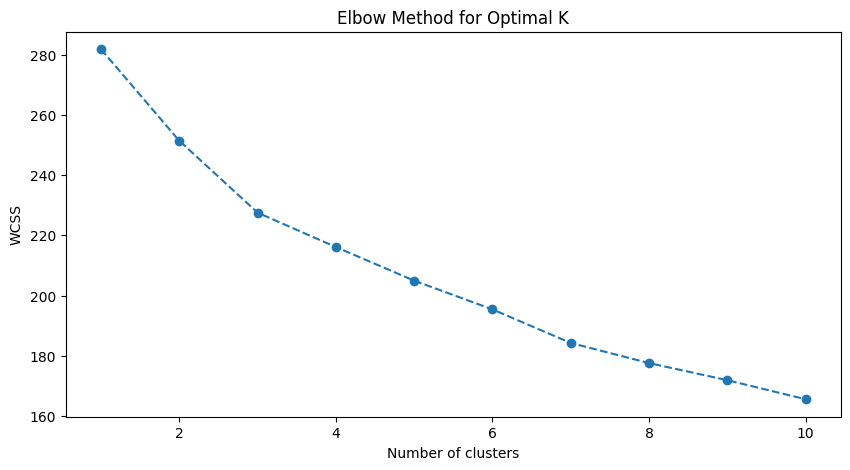

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dropping the 'Customer Last Name' column as it's not needed for clustering
X = customer_offer_matrix.reset_index().drop('Customer Last Name', axis=1)
print(X.head())
# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

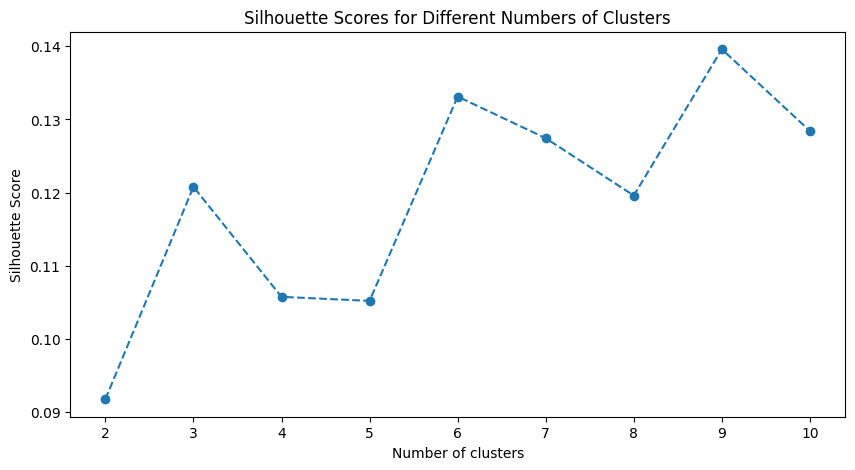

In [11]:
from sklearn.metrics import silhouette_score

# Calculating silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


I will go with k = 3 , since 3, 4 are good from elbow method , but looking at silhouette score , I can say that 3 is better , if we want the clusters to be distinct and different from each other and suitable for the business applications , so I will not consider high numbers of clusters like 6 or 9 because it will consider very fine distinctions between data points and that's not our goal

In [12]:
# Performing K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
customer_clusters = kmeans.fit_predict(X)

# Adding the cluster labels to the customer-offer matrix
customer_offer_matrix['Cluster'] = customer_clusters


customer_offer_matrix.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Offer #,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,Cluster
Customer Last Name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


for the purpose of comparing response rates to offers for each cluster I will use the mean because clusters might have different numbers of customers. Using the mean normalizes this, allowing for a fair comparison between clusters.


In [13]:
# Analyzing the clusters to identify their characteristics
cluster_analysis_mean = customer_offer_matrix.groupby('Cluster').mean()
cluster_analysis_mean.T


Cluster,0,1,2
Offer #,,,
1,0.183673,0.0625,0.000000
2,0.081633,0.3750,0.000000
3,0.081633,0.0000,0.057143
4,0.244898,0.0000,0.000000
5,0.081633,0.0000,0.000000
6,0.224490,0.0000,0.028571
7,0.061224,0.0000,0.457143
8,0.061224,0.0000,0.485714
9,0.204082,0.0000,0.000000


In [14]:
cluster_analysis_mean.T.describe()

Cluster,0,1,2
count,32.000000,32.000000,32.000000
mean,0.117985,0.083984,0.085714
std,0.097218,0.201187,0.161624
min,0.000000,0.000000,0.000000
25%,0.061224,0.000000,0.000000
50%,0.081633,0.000000,0.000000
75%,0.153061,0.062500,0.057143
max,0.408163,0.750000,0.485714


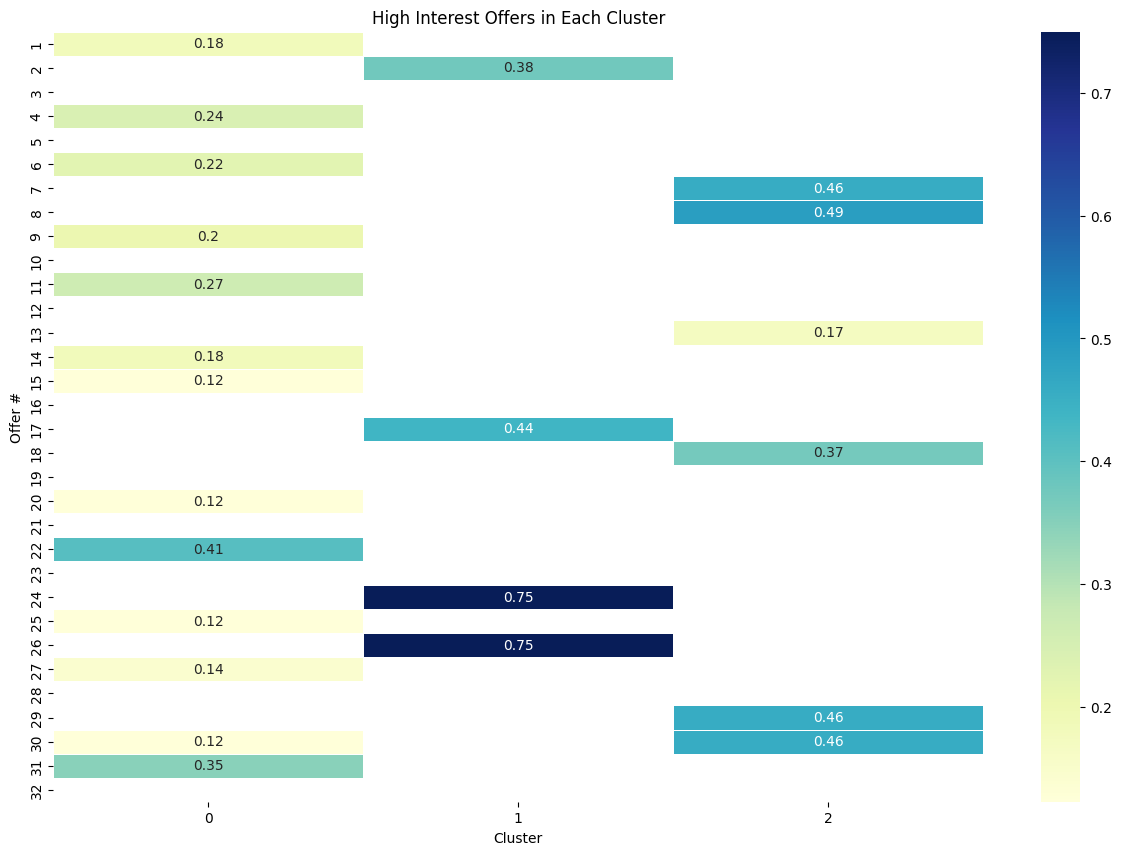

In [15]:
import seaborn as sns


# We'll focus on offers with higher than average response rate in each cluster
high_interest_offers = cluster_analysis_mean.T[cluster_analysis_mean.T > cluster_analysis_mean.T.mean()]

# Plotting the high interest offers for each cluster
plt.figure(figsize=(15, 10))
sns.heatmap(high_interest_offers, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('High Interest Offers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Offer #')
plt.show()

In [16]:
#create new dataframe to merge it offers details
customer_clusters = customer_offer_matrix['Cluster'].reset_index()

# Merging the new customer cluster information with the transactions data
merged_df = pd.merge(transaction_df, customer_clusters, on='Customer Last Name')

# Then, we merge this with the offers data to add offer details
final_df = pd.merge(merged_df, offer_info_df, on='Offer #')

# Grouping by cluster and offer number to see the popularity of each offer within each cluster
cluster_offer_count = final_df.groupby(['Cluster', 'Offer #']).size().unstack(fill_value=0)


In [17]:
cluster_offer_count.head()

Offer #,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Cluster,,,,,,,,,,,,,,,,,,,,,
0,9,4,4,12,4,11,3,3,10,4,...,4,0,6,3,7,5,1,6,17,4
1,1,6,0,0,0,0,0,0,0,1,...,1,12,0,12,1,0,0,0,0,0
2,0,0,2,0,0,1,16,17,0,2,...,0,0,0,0,1,1,16,16,0,0


In [18]:
cluster_offer_count.T

Cluster,0,1,2
Offer #,,,
1,9,1,0
2,4,6,0
3,4,0,2
4,12,0,0
5,4,0,0
6,11,0,1
7,3,0,16
8,3,0,17
9,10,0,0


Grouping by cluster and product type to see the popularity of each type of product within each cluster

In [19]:
# Analyzing customer preferences based on (Varietal)


cluster_varietal_count = final_df.groupby(['Cluster', 'Varietal']).size().unstack(fill_value=0)

cluster_varietal_count.head()


Varietal,Cabernet Sauvignon,Champagne,Chardonnay,Espumante,Malbec,Merlot,Pinot Grigio,Pinot Noir,Prosecco
Cluster,,,,,,,,,
0,31,75,14,8,15,13,1,7,21
1,0,1,1,0,1,1,0,37,2
2,1,5,0,32,16,6,16,0,20


Analyzing customer preferences based on other variables: quantity, time, and origin

In [21]:
# Quantity: the preferred quantity levels within each cluster
cluster_quantity_count = final_df.groupby(['Cluster', 'Minimum Qty (kg)']).size().unstack(fill_value=0)

# Time:  to see the preferred time (campaign month) within each cluster
cluster_time_count = final_df.groupby(['Cluster', 'Campaign']).size().unstack(fill_value=0)

# Origin:preferred wine origins within each cluster
cluster_origin_count = final_df.groupby(['Cluster', 'Origin']).size().unstack(fill_value=0)

cluster_quantity_count.head(), cluster_time_count.head(), cluster_origin_count.head()


(Minimum Qty (kg)  6    12   72   144
 Cluster                             
 0                  14   11  118   42
 1                  12    7   11   13
 2                  84    4    5    3,
 Campaign  April  August  December  February  January  July  June  March  May  \
 Cluster                                                                        
 0            14      28        27        20       13     5    19     17   16   
 1             1       0         0         0        7     7     1      0    1   
 2             2       3        16         2        0    14     0     34    7   
 
 Campaign  November  October  September  
 Cluster                                 
 0                6       16          4  
 1                0       13         13  
 2               17        1          0  ,
 Origin   Australia  California  Chile  France  Germany  Italy  New Zealand  \
 Cluster                                                                      
 0                9          10  

Text(0.5, 23.52222222222222, 'Varietal')

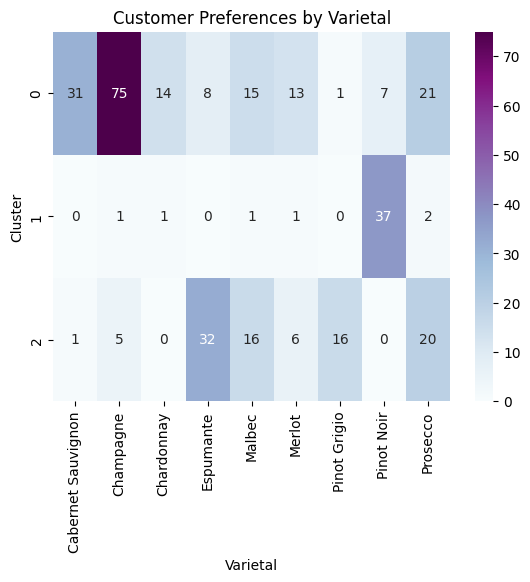

In [ ]:
import seaborn as sns
sns.heatmap(cluster_varietal_count, annot=True, cmap="BuPu")
plt.title('Customer Preferences by Varietal')
plt.ylabel('Cluster')
plt.xlabel('Varietal')

Text(0.5, 23.52222222222222, 'Minimum Qty (kg)')

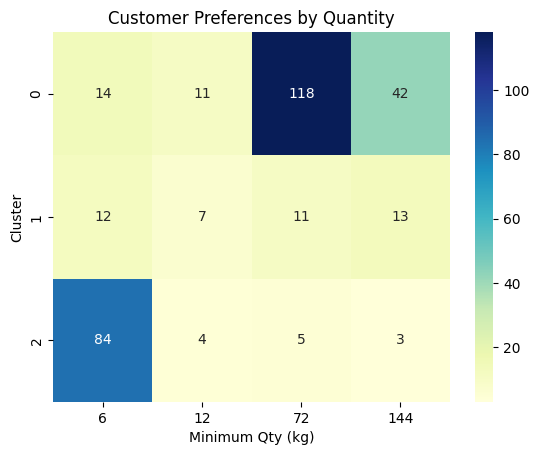

In [ ]:
sns.heatmap(cluster_quantity_count, annot=True,fmt='d', cmap="YlGnBu")
plt.title('Customer Preferences by Quantity')
plt.ylabel('Cluster')
plt.xlabel('Minimum Qty (kg)')

Text(0.5, 23.52222222222222, 'Campaign')

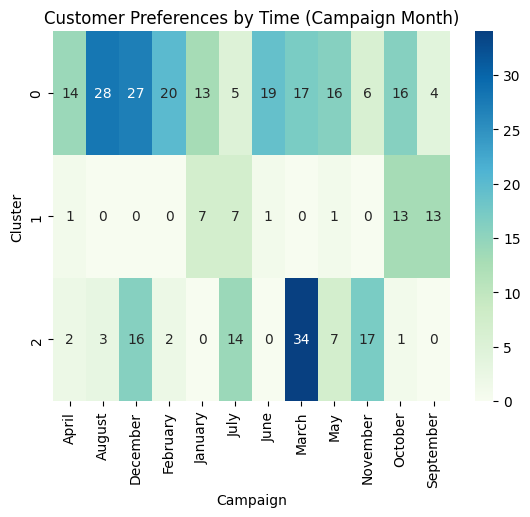

In [ ]:
sns.heatmap(cluster_time_count, annot=True, cmap="GnBu")
plt.title('Customer Preferences by Time (Campaign Month)')
plt.ylabel('Cluster')
plt.xlabel('Campaign')

Text(0.5, 23.52222222222222, 'Origin')

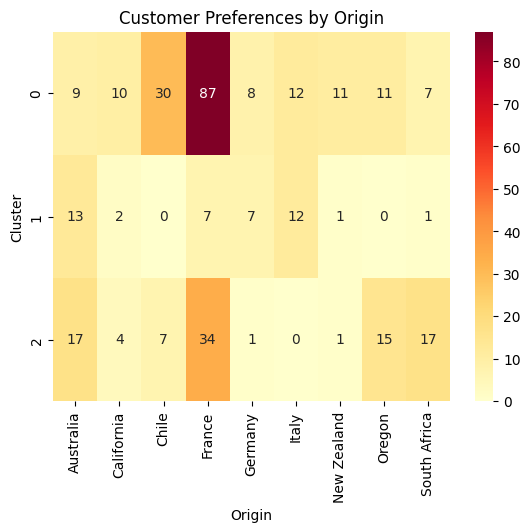

In [ ]:
sns.heatmap(cluster_origin_count, annot=True, fmt="d", cmap="YlOrRd")
plt.title('Customer Preferences by Origin')
plt.ylabel('Cluster')
plt.xlabel('Origin')

<ipython-input-56-d34e3cb460c9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Offer #', y='Count', data=top_offers_cluster_0, ax=axes[0], palette="Blues_d")
<ipython-input-56-d34e3cb460c9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Offer #', y='Count', data=top_offers_cluster_1, ax=axes[1], palette="Greens_d")
<ipython-input-56-d34e3cb460c9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Offer #', y='Count', data=top_offers_cluster_2, ax=axes[2], palette="Reds_d")


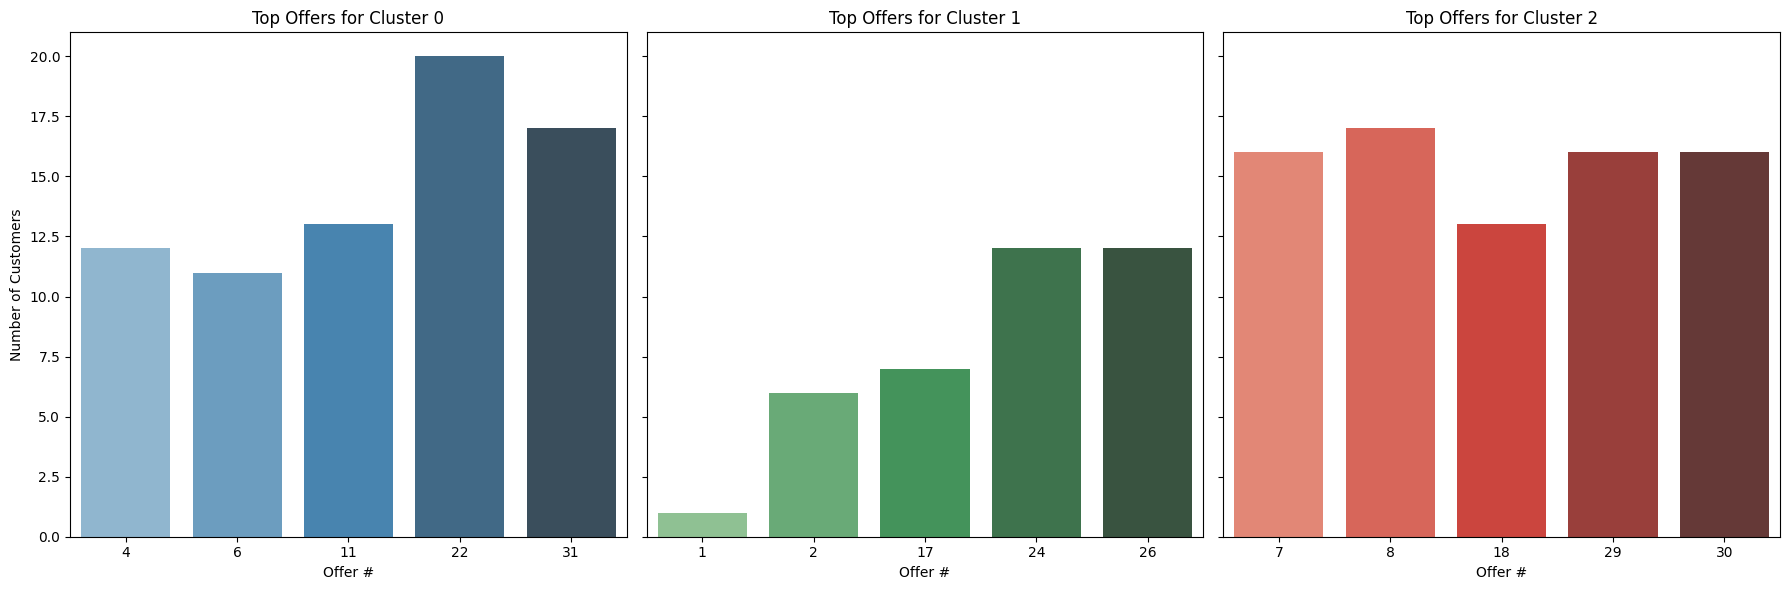

In [ ]:
#calculating the most popular offers in each cluster and plotting them as barcharts
top_offers = final_df.groupby(['Cluster', 'Offer #']).size().reset_index(name='Count')
top_offers = top_offers.sort_values(by=['Cluster', 'Count'], ascending=[True, False]).groupby('Cluster').head(5)

# Preparing data for plotting
top_offers_cluster_0 = top_offers[top_offers['Cluster'] == 0]
top_offers_cluster_1 = top_offers[top_offers['Cluster'] == 1]
top_offers_cluster_2 = top_offers[top_offers['Cluster'] == 2]

# Plotting the top offers for each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(x='Offer #', y='Count', data=top_offers_cluster_0, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top Offers for Cluster 0')
axes[0].set_xlabel('Offer #')
axes[0].set_ylabel('Number of Customers')

sns.barplot(x='Offer #', y='Count', data=top_offers_cluster_1, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top Offers for Cluster 1')
axes[1].set_xlabel('Offer #')
axes[1].set_ylabel('Number of Customers')

sns.barplot(x='Offer #', y='Count', data=top_offers_cluster_2, ax=axes[2], palette="Reds_d")
axes[2].set_title('Top Offers for Cluster 2')
axes[2].set_xlabel('Offer #')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


In [ ]:
top_offers.head()

,Cluster,Offer #,Count
19,0,22,20
27,0,31,17
10,0,11,13
3,0,4,12
5,0,6,11


Using PCA to visualise cluster , then checking the percentage of explained variance

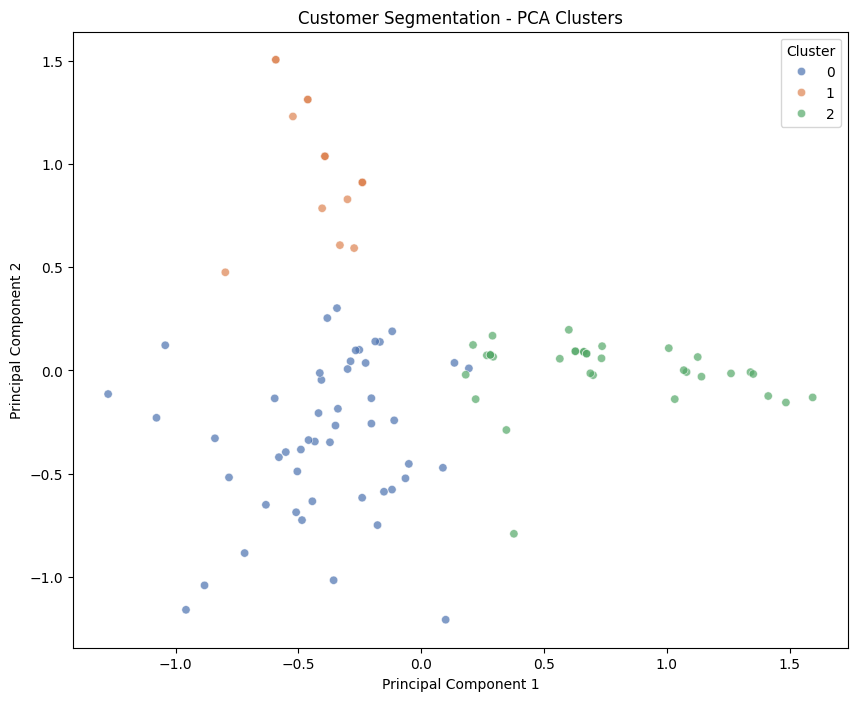

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for PCA
pca_data = customer_offer_matrix.drop('Cluster', axis=1)
clusters = customer_offer_matrix['Cluster']

# Applying PCA to reduce dimensions to 2 for visualization purpose only
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_data)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters.values


plt.figure(figsize=(10, 8))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="deep", alpha=0.7)
plt.title("Customer Segmentation - PCA Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


In [24]:
# Calculating the variance explained by principal components

explained_variance = pca.explained_variance_ratio_
explained_variance_sum = explained_variance.sum()

explained_variance, explained_variance_sum


(array([0.14386393, 0.10800289]), 0.2518668199877445)

the explained varience by only two coomponents is not enough for our data but it is used for visualization to show that we have well defined and distinct clusters

Now I will visualize clusters with T-sne to make sure we don't have information loss


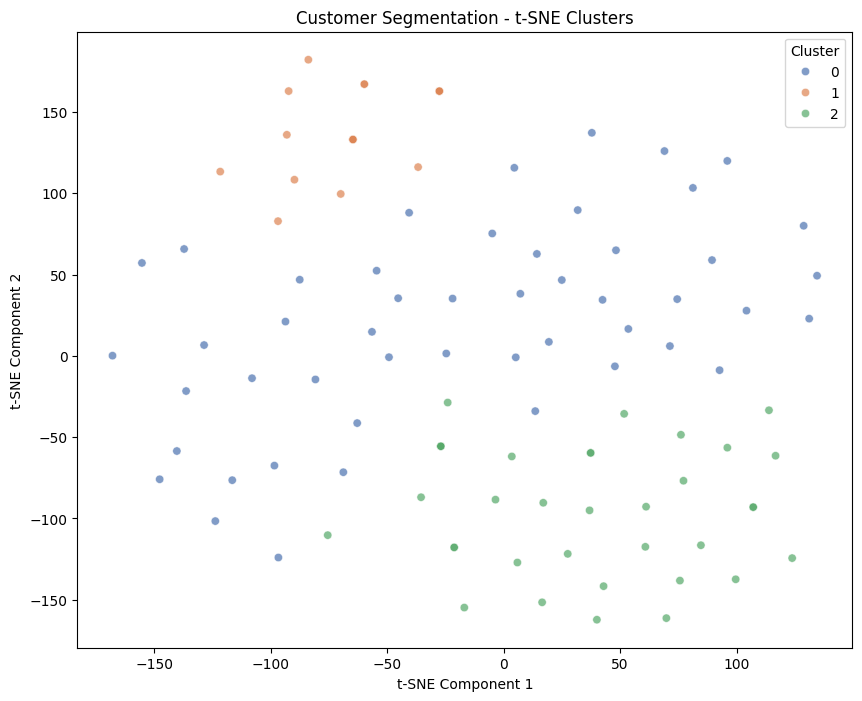

In [25]:
from sklearn.manifold import TSNE

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(pca_data)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = clusters.values

# Plotting the clusters with t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", data=tsne_df, palette="deep", alpha=0.7, marker='o')
plt.title("Customer Segmentation - t-SNE Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.show()


Here also it shows better results in the visual for well defined and distinct clusters, and the number of 3 clusters showed good results , the conclusions are explained in the presentation, Thank you.